# **Project Background**

**About Dataset 1.**

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

**About Dataset 2.**

An international e-commerce company based wants to discover key insights from their customer database.
They want to use some of the most advanced machine learning techniques to study their customers.
The company sells electronic products.

**Goals.**

In the e-commerce industry, offering discounts is a common strategy used to attract customer attention and boost sales. However, it's important to understand the impact of discount offers on customer product preferences.

To enhance understanding of the relationship between discount offers and product preferences, this project aims to conduct an A/B testing study comparing the effects of discount offers on product priorities among customers. Through careful data analysis, the project aims to answer the question of whether customers who receive discounts tend to prioritize discounted products over others.

**Data From kaggle.com**

# **Import Library and Dataset**

In [ ]:
!pip install termcolor

import pandas as pd
import seaborn as sns
import numpy as np
import statistics
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload

In [ ]:
DataGroupA = pd.read_csv('/content/Train.csv')
DataGroupB = pd.read_csv('/content/shipping_ecommerce.csv')

In [ ]:
# Mengubah kolom Product_importance menjadi variabel kategorikal
DataGroupA['Product_importance'] = DataGroupA['Product_importance'].apply(lambda x: 0 if x == 'low' else (1 if x == 'medium' else 2))
DataGroupB['Product_importance'] = DataGroupB['Product_importance'].apply(lambda x: 0 if x == 'low' else (1 if x == 'medium' else 2))

In [ ]:
# Data Manipulation: Indication of Groups in A New Variable
DataGroupA["Group"] = "GroupA"
DataGroupB["Group"] = "GroupB"

In [ ]:
#Combining the Datasets
Data = pd.concat([DataGroupA, DataGroupB], ignore_index=True)

# **A/B Testing**

 A/B Testing for Discount_offered  

Summary Statistics by Groups for Discount_offered 

Discount_offered
Group         GroupA        GroupB
count   10999.000000  10998.000000
mean       13.373216     13.373704
std        16.205527     16.206183
median      7.000000      7.000000
min         1.000000      1.000000
max        65.000000     65.000000 

Histogram by Groups for Discount_offered 



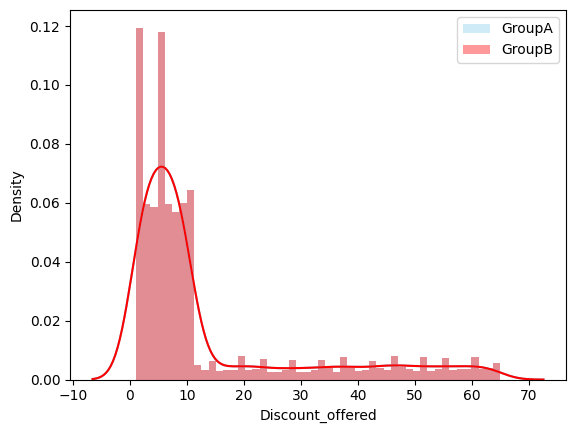

Box Plot by Groups for Discount_offered 



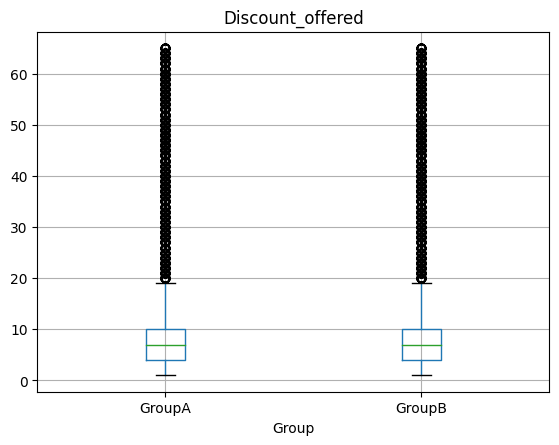

1. Step: Testing the Normality Assumption for Discount_offered 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of Discount_offered values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for Discount_offered 

u_value=60484248.000, mannw_test_p=0.999 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of Discount_offered values. 

 A/B Testing for Prior_purchases  

Summary Statistics by Groups for Prior_purchases 

Prior_purchases
Group         GroupA        GroupB
count   10999.000000  10998.000000
mean        3.567597      3.567558
std         1.522860      1.522924
median      3.000000      3.000000
min         2.000000      2.000000
max        10.000000     10.000000 

H

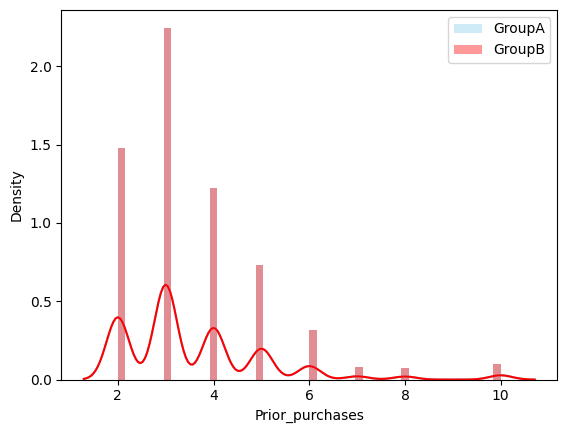

Box Plot by Groups for Prior_purchases 



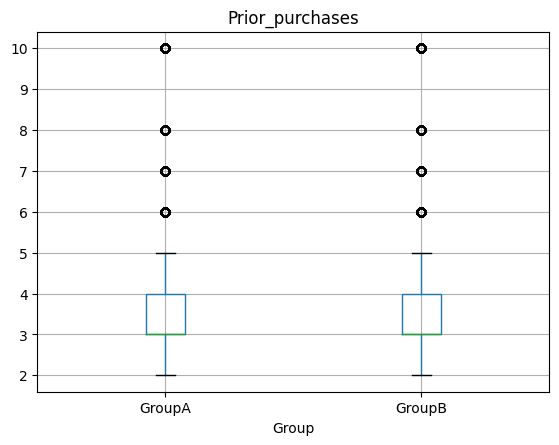

1. Step: Testing the Normality Assumption for Prior_purchases 

GroupA_shaphiro_p = 0.000, GroupB_shaphiro_p = 0.000 

Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of Prior_purchases values in GroupA and GroupB are not likely to normal distribution. 

3. Step: Alternative 2 -> Mann-Whitney U Test for Prior_purchases 

u_value=60485633.000, mannw_test_p=0.996 

Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in distributions of Prior_purchases values. 

 A/B Testing for Product_importance  

Summary Statistics by Groups for Product_importance 

Product_importance
Group    GroupA        GroupB
count   10999.0  10998.000000
mean        2.0      0.604655
std         0.0      0.641467
median      2.0      1.000000
min         2.0      0.000000
max         2.0      2.000000 

Histogram by Groups for Product

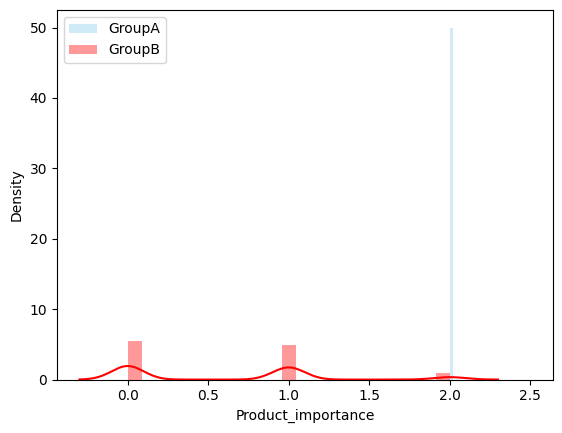

Box Plot by Groups for Product_importance 



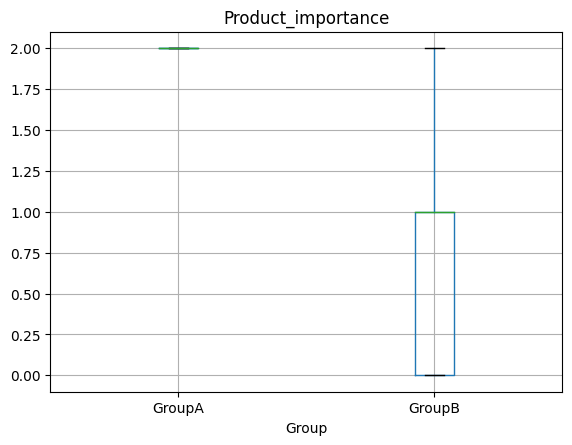

1. Step: Testing the Normality Assumption for Product_importance 

GroupA_shaphiro_p = 1.000, GroupB_shaphiro_p = 0.000 

Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. Accordingly you can check if the Product_importance values in GroupB contain outlier or not 

3. Step: Alternative 2 -> Mann-Whitney U Test for Product_importance 

u_value=115753476.000, mannw_test_p=0.000 

Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between GroupA and GroupB in distributions of Product_importance values. 

Median of GroupB in Product_importance is greater than GroupA 



In [ ]:
variables = ["Discount_offered", "Prior_purchases", "Product_importance"]

for x in variables:
    print(colored(" A/B Testing for ","cyan", attrs=["bold",'reverse', 'blink'])+colored(x+" ","cyan", attrs=["bold",'reverse', 'blink']),"\n")
    print(colored("Summary Statistics by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    result3 = Data.groupby("Group")[x].aggregate(["count","mean","std","median","min","max"])
    result4 = result3.transpose()
    print(x)
    print(result4,"\n")
    print(colored("Histogram by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    #sns.displot(Data, x=x, hue="Group", element="step", kde=True)
    #plt.show()
    sns.distplot( DataGroupA[x] , color="skyblue", label="GroupA")
    sns.distplot( DataGroupB[x] , color="red", label="GroupB")
    plt.legend()
    plt.show()


    def normald():

        Data.boxplot(column=[x], by="Group",return_type=None)
        plt.suptitle("")
        print(colored("Box Plot by Groups for "+x,"cyan", attrs=["bold"]),"\n")
        plt.show()

        print(colored("1. Step: Testing the Normality Assumption for "+x,"cyan", attrs=["bold"]),"\n")
        GroupA_shaphiro_w, GroupA_shaphiro_p = shapiro(DataGroupA[x])
        GroupB_shaphiro_w, GroupB_shaphiro_p = shapiro(DataGroupB[x])
        print("GroupA_shaphiro_p = %.3f, GroupB_shaphiro_p = %.3f" % (GroupA_shaphiro_p, GroupB_shaphiro_p),"\n")

        if GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p > 0.05:
            print("Shaphiro Wilk Test resulted as p > .05 for GroupA and GroupB which indicates that H0 can NOT be rejected. "
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are likely to normal distribution.","\n")
            return 1
        elif GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p < 0.05:
            print("Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. "
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are not likely to normal distribution.","\n")
            return 2
        elif GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p < 0.05:
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. "
                  "Accordingly you can check if the "+x+" values in"+" GroupB contain outlier or not","\n")
            return 3
        else :
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupB while p < .05 for GroupA which indicates that H0 is rejected for GroupA. "
                "Accordingly you can check if the "+x+" values in"+" GroupA contain outlier or not","\n")
            return 4

    result = normald()
    if result == 1:

            print(colored("2. Step: Testing the Homogeneity Assumption for "+x,"cyan", attrs=["bold"]),"\n")
            levene_F, levene_p = stats.levene(DataGroupA[x], DataGroupB[x])
            print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")
            if levene_p > 0.05:
                print("Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly variances of GroupA and GroupB are equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(DataGroupA[x], DataGroupB[x], equal_var=True)
                print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else:
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(DataGroupA["Discount_offered"]) > statistics.mean(DataGroupB["Discount_offered"]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
            else :
                print("Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly variances of GroupA and GroupB are not equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(DataGroupA[x], DataGroupB[x], equal_var=False)
                print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else:
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(DataGroupA[x]) > statistics.mean(DataGroupB[x]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")


    elif result == 2 or result == 3 or result == 4:

            print(colored("3. Step: Alternative 2 -> Mann-Whitney U Test for "+x,"cyan", attrs=["bold"]),"\n")
            u_value, mannw_test_p = mannwhitneyu(DataGroupA[x], DataGroupB[x])
            print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p),"\n")
            if mannw_test_p > 0.05:
                print("Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
            else:
                print("Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
                if statistics.median(DataGroupA["Discount_offered"]) > statistics.median(DataGroupB["Discount_offered"]):
                    print("Median of GroupA in "+x+" is greater than GroupB","\n")
                else:
                    print("Median of GroupB in "+x+" is greater than GroupA","\n")
    else :
            print("Something is wrong. Check your data!")

**Conclusion of the Bidding Case Through A/B Testing Example**

Based on the A/B testing results, we can conclude that there is a significant difference between GroupA and GroupB in terms of Product_importance values. Specifically, the median value of Product_importance in GroupB is greater than that of GroupA, indicating that customers in GroupB tend to prioritize discounted products over others more than those in GroupA.

However, there is no significant difference between the two groups in terms of Discount_offered and Prior_purchases values. This suggests that the bidding strategy does not have a significant impact on the average discount offered or the number of prior purchases.

Based on these results, if the client's primary goal is to increase customer product preferences towards discounted products, then the Average Bidding strategy (GroupB) may be a better choice. However, it's important to note that other performance metrics such as conversion rate and impression should also be evaluated to make a more informed decision.

In conclusion, the A/B testing results suggest that the Average Bidding strategy (GroupB) may be more effective in increasing customer product preferences towards discounted products, but further analysis of other performance metrics is necessary to make a final recommendation to the client.

**1. How would you define the hypothesis of this A/B test?**
   
   H0 (Null Hypothesis): There is no significant difference between the Average Bidding strategy (GroupB) and the Maximum Bidding strategy (GroupA) in terms of customer product preferences towards discounted products.
   
   Ha (Alternative Hypothesis): There is a significant difference between the Average Bidding strategy (GroupB) and the Maximum Bidding strategy (GroupA) in terms of customer product preferences towards discounted products.

**2. How can we conclude statistically significant results?**

Via AB tests

**3. Which statistical test did you use, and why?**

In this case, we used the Mann-Whitney U Test for the Product_importance variable because the Shapiro-Wilk test resulted as p < .05 for GroupB, indicating that the distribution of Product_importance values in GroupB is not likely to be normal. The Mann-Whitney U Test is a non-parametric test that does not assume normality and can be used to compare the distributions of two independent groups. It is an appropriate test to use when the assumptions of the Independent Samples of t Test are not met.

For the Discount_offered and Prior_purchases variables, we used the Mann-Whitney U Test as well because the Shapiro-Wilk test resulted as p < .05 for both groups, indicating that the distributions of Discount_offered and Prior_purchases values in both groups are not likely to be normal.

In general, it's important to check the assumptions of the statistical test before choosing which test to use. If the assumptions are met, then we can use a parametric test such as the Independent Samples of t Test. If the assumptions are not met, then we can use a non-parametric test such as the Mann-Whitney U Test.